# Introduction to Support Vector Machine

-----

In this notebook, we introduce the [Support Vector Machine (SVM) algorithm][svm], a powerful, but simple supervised learning approach to predicting data. For classification tasks, the SVM algorithm attempts to divide data in the feature space into distinct categories. By default, this division is performed by constructing hyperplanes that optimally divide the data. For regression, the hyperplanes are constructed to map the distribution of data. In both cases, these hyperplanes map linear structures in a non-probabilistic manner. By employing a _kernel trick_, however, we can transform non-linear data sets into linear ones, thus enabling SVM to be applied to non-linear problems.

SVMs are powerful algorithms that have gained widespread popularity. This is partly due to the fact that they are effective in high dimensional feature spaces, including those problems where the number of features is similar to or slightly exceeds the number of instances. Unlike KNN, which has high demand on memory with large dataset, SVMs can be memory efficient since only the support vectors are needed to compute the hyperplanes. Finally, by using different kernels, SVM can be applied to a wide range of learning tasks. On the other hand, these models are black boxes, and it can be difficult to explain how they operate, especially on new instances. They do not, by default, provide probability estimates since the hyperplane is constructed to cleanly divide the training data.

In this notebook, we first explore the basic formalism of the SVM algorithm, including the construction of hyperplane and the kernel trick, which enables SVM to be applied to non-linear problems. Next, we explore the application of SVM to classification problems, which is known as support vector classification, or SVC. To introduce this topic, we will once again use the Iris data to construct an SVC estimator, plot the calculated hyperplane, explore the resulting performance. Next, we will switch to a more complex data set, the adult data. Finally, we will apply SVM to regression problems, which is known as support vector regression. For this we will use the MPG data introduced in previous lessons.

-----
[idt]: intro2dt.ipynb
[svm]: https://en.wikipedia.org/wiki/Support_vector_machine

## Table of Contents

[Formalism](#Formalism)

- [Hyperplane](#Hyperplane)
- [Non-Linear Kernels](#Non-Linear-Kernels)

[Support Vector Machine: Classification](#Support-Vector-Machine:-Classification)

[Support Vector Machine: Regression](#Support-Vector-Machine:-Regression)

- [Regression: Auto MPG Data](#Regression:-Auto-MPG-Data)

-----

Before proceeding with the _Formalism_ section of this Notebook, we first have our standard notebook setup code.

-----



In [1]:
# Set up Notebook

%matplotlib inline

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We do this to ignore several specific Pandas warnings
import warnings
warnings.filterwarnings("ignore")

sns.set_style('white')

-----

[[Back to TOC]](#Table-of-Contents)

## Formalism

As was the case with the decision tree or KNN, one of the simplest machine learning algorithms to understand and employ is the [support vector machine][svm]. For classification tasks, this algorithm simply divides the data with hyperplanes into the resulting classes; while for regression, the hyperplanes form a predictive model of the underlying data. These hyperplanes, by default, produce a linear classifier (or regressor) since they are restricted to be linear in the features. However, unlike a decision tree, SVM produces a black box model; we can't examine the model, especially in higher dimensions, to understand why specific predictions are made. In order to construct the optimal set of hyperplanes, SVM assumes the features are standardized and can be compared equally. Thus, for proper use of an SVM on a data set, we should standardize the features.

Given a set of data with $n$ features, we can construct many different hyperplanes that divide the data. The SVM algorithm selects the optimal hyperplane by finding the one that produces the largest separation, between the data, which is known as the *margin*. The hyperplane that accomplishes this goal is known as the maximum-margin hyperplane. For high dimensional data, a set of hyperplanes is constructed, which accomplishes this same task. In cases where the data cannot be cleanly separated, many SVM implementations map the data set into a higher dimensional space by using a kernel function, where the data are linearly separated and construct a set of optimal hyperplanes in this space. This process can also be used to transform a non-linear feature space into a linear (or approximately linear) space where traditional SVM can be applied.

In the rest of this section, we demonstrate the construction of hyperplane by using the Iris data set. To simplify the visualization of these data and the resulting hyperplanes, we use only two classes (or species) and two dimensions. Since SVM, by default, provides a linear classification, this hyperplane will generate linear division between the two classes. After this, we demonstrate how a kernel can be employed to transform a non-linear problem into a linear classification task.

-----

[svm]: https://en.wikipedia.org/wiki/Support_vector_machine

-----

### Hyperplane

To demonstrate how hyperplanes can divide data, we will use the Iris classification data set. There are 3 different species and 4 features in the dataset. For demo purpose, we will only use 2 classes (Setosa and Versicolor), and 2 features, (Sepal Width and Petal Width), to enable easier visualization of the training data, test data, and the hyperplane. In the following two Code cells, we first load the Iris data and select data points we want to keep. We then divide the dataset into training and testing, and then normalize the data by using the training features.

The second Code cell uses the training data to generate an SVC (don't worry about the details of doing this right now, they are introduced in the next section). Then, we make a scatter plot of the training data, colored by their label, and display test data with a different symbol (see the plot legend for full details). Next, we generate a grid of points through this space and apply the predetermined SVC to generate decisions over this grid. Finally, we plot the computed hyperplane and the support vectors used to compute these hyperplanes from the training data.

The hyperplane shown in the plot is denoted by the solid gray line. We also plot the decision boundaries for the hyperplane, the upper boundary as a blue dashed line, and the lower boundary as a red dashed line. SVM decides a boundary in such a way that the separation between the two classes is as wide as possible.

The support are those training data that are used to finalize the selection of the best hyperplane. The training data that anchor the support vectors are enclosed in a large yellow circle. The vector extends from these points to the hyperplane (forming a right angle to the hyperplane). The margin for each support vector is the distance from the support to the hyperplane (or the length of the support vector). It is the combinations of these distances that we seek to maximize when we compute the best hyperplane. 

__Note:__ You are **not** required to understand the code, especially the plotting part. Pay attention to the plot itself and understand SVM with its help.

-----

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris_df = pd.read_csv('iris.csv')
#create new column to hold encoded species
iris_df['species_cat'] = LabelEncoder().fit_transform(iris_df.species)

#Only keep Setosa and Versicolor data
setosa_versicolor = iris_df[iris_df.species_cat < 2]

#Define data and label

data = setosa_versicolor[['sepal_width', 'petal_width']]
label = setosa_versicolor['species_cat']

# Split data into training and testing
d_train, d_test, l_train, l_test = train_test_split(data, label, test_size=0.4, random_state=23)

# Standardize data
sc = StandardScaler().fit(d_train)

d_train_sc = sc.transform(d_train)
d_test_sc = sc.transform(d_test)

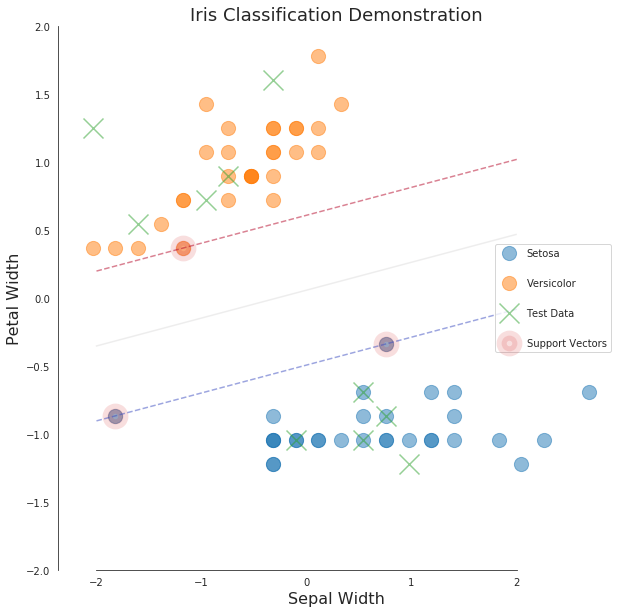

In [3]:
from sklearn.svm import SVC
from matplotlib import cm

# Fit the model, don't regularize for illustration purposes
iris_model = SVC(kernel='linear', C=1E6)
iris_model.fit(d_train_sc, l_train)

# Number of training samples to show in plot
num_show = 10

# Now we create our figure and axes for the plot we will make.
fig, ax = plt.subplots(figsize=(10, 10))
        
# Select features from training data to plot
x = d_train_sc[:, 0]
y = d_train_sc[:, 1]

# Labels for instances
iris_name = ['Setosa', 'Versicolor']

# Iterate over types of instances, plotting each separately
for idx in np.unique(l_train):
    i = int(idx)
    ax.scatter(x[l_train == i], y[l_train == i], 
               label=f'{iris_name[idx]}',
               s=200, alpha = .5, cmap=cm.coolwarm) 

# Now plot the test data differently
xx = d_test_sc[:num_show, 0]
yy = d_test_sc[:num_show, 1]
ax.scatter(xx, yy, label='Test Data',
           marker='x', s=400, alpha = .5, cmap=cm.coolwarm) 

# Create grid to evaluate model
xx = np.linspace(-2, 2, 30)
yy = np.linspace(-2, 2, 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# Predict on this grid
ZZ = iris_model.decision_function(xy)

# Take the grid and construct the hyperplanes 
# by treating them as contours. Note that we only select 
# the first and third hyperplane, otherwise plot becomes
# too busy.
z = ZZ.reshape(XX.shape)

# Plot hyperplanes
ax.contour(XX, YY, z, levels=[-1, 0, 1], 
           alpha=0.5, linewidth=100,linestyles=['--', '-', '--'],
           cmap=cm.coolwarm) 

# Plot support vector data points.
ax.scatter(iris_model.support_vectors_[:, 0], 
           iris_model.support_vectors_[:, 1], 
           s=250, linewidth=10, alpha=0.15, cmap=cm.coolwarm,
           label='Support Vectors')

# Decorate and clean plot
ax.set_xlabel('Sepal Width', fontsize=16)
ax.set_ylabel('Petal Width', fontsize=16)
ax.legend(loc = 7, labelspacing=2)
ax.set_title("Iris Classification Demonstration", fontsize=18)

sns.despine(offset=0, trim=True)

-----


### Non-Linear Kernels

In many real-world cases, the data of interest are non-linear. In these cases, we can still successfully employ SVM by transforming the data into a space where the data are linearly separated. This process is known as the *kernel trick*, since we employ a kernel function to perform the mapping. To demonstrate this process, the following Code cell generates two classes of data. The first class is enclosed in a circle about the origin, while the second class is contained in a ring that surrounds the first class. 

__Note:__ You are **not** required to understand the code in the next two Code cells. Pay attention to the plot itself and understand the effect of a non-linear kernel.


-----

In [4]:
# Generate random data in polar coordinates
# Then tranform to r, theta as linear. 
# This demonstrates the kernel SVM trick.

# Set random state for reproducability
rng = np.random.RandomState(23)

# Random radial data, two ranges
r1 = rng.uniform(0, 1, 50)
r2 = rng.uniform(1.25, 2.5, 50)

# Random theta uniformly around circle.
t1 = rng.uniform(0, 360, 50)
t2 = rng.uniform(0, 360, 50)

# Transform to Cartesian, which forms
# our new starting data set
x1 = r1 * np.sin(t1)
x2 = r2 * np.sin(t2)
y1 = r1 * np.cos(t1)
y2 = r2 * np.cos(t2)

-----

Given these simulated data, the next Code cell first plots the original data as generated, the first class is blue points, while the second class is green points. Clearly these data are distributed in a non-linear pattern, and a standard SVC would not perform well on this task (A non-linear technique, such as a decision tree, would likely perform better, assuming we have sufficient data to generate a tree that effectively captures the non-linear signal without overfitting). 

We can, however, apply a transformation to convert from the original Cartesian coordinate system spanned by the original data to a polar coordinate system, which uses radial distance from the origin as the new `x` axis. The angle from the original positive x axis is the new `y` axis. In this new space, the data are easily separated by a simple vertical line, and thus an SVC would perform extremely well in this new projection. To effectively apply SVM to data, we must often choose a kernel that will employ this type of transformation, or another, to reliably project data into a new space where the data can be effectively divided by the SVM algorithm.

-----

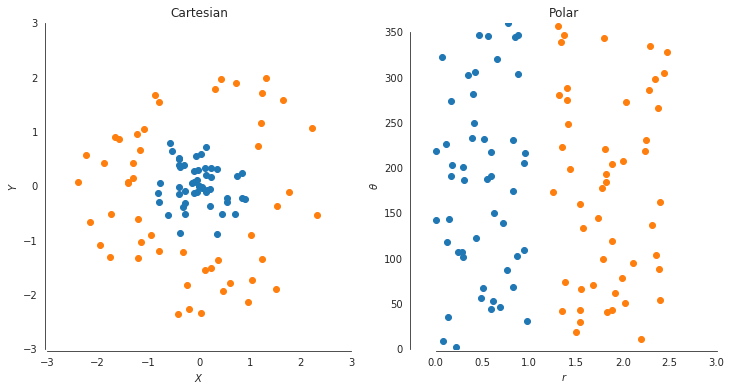

In [5]:
# Two plots, one for polar, one for linear.
fig, axs = plt.subplots(figsize=(12, 6.0), nrows=1, ncols=2, sharex=False)
adj = plt.subplots_adjust(hspace=0.5)

# Plot x,y dat
axs[0].scatter(x1, y1)
axs[0].scatter(x2, y2)
axs[0].set(xlabel=r'$X$', xlim=(-3, 3),
           ylabel=r'$Y$', ylim=(-3, 3),
           title='Cartesian')

# Plot, r, theta
axs[1].scatter(r1, t1)
axs[1].scatter(r2, t2)
axs[1].set(xlabel=r'$r$', xlim=(-0.25, 3),
           ylabel=r'$\theta$', ylim=(0, 360),
           title='Polar')

# Clean plots
sns.despine(offset = 2, trim=True)

-----

[[Back to TOC]](#Table-of-Contents)


## Support Vector Machine: Classification

With a discussion on the construction of hyperplanes complete, we can now introduce how to perform [support vector classification][sksvc] by using the scikit-learn library. This is accomplished by using the `SVC` estimator, which is located in the `svm` module. To perform linear SVC, we must specify that we wish to use a `linear` kernel as a hyperparameter, (note that this is not the default option). Instead, we could use the `LinearSVC` estimator, which does not support a kernel hyperparameter, and can only be used for linear classification problems.

The `SVC` estimator accepts a number of hyperparameters that control how it performs. Some of the more useful hyperparameters include:

- `kernel`: Controls the kernel used to transform the data into a linear space. Options include `linear`, `rbf` for radial basis function, similar to the transformation displayed earlier in this notebook, `poly` for polynomial, `sigmoid` For a transformation similar to that used by the logistic function, or a user defined function, which can also be pre-computed.
- `C`: Penalty term for regularization, setting this high reduces the effects of regularization.
- `class_weight`: Determines how unbalanced classes are handled, by default, weights are assumed to be uniform. Specifying the value of `balanced` for this hyperparameter indicates that weights should be determined automatically from the training data. 
- `random_state`: Seed for random number generation, setting this ensures reproducibility.

To demonstrate how to use SVC, we will use the [Adult Income Dataset][uciad] introduced in the previous lessons. In the following Code cells, we first load the adult data, encode `Salary` column as label, then use patsy module to create training data and feature. We use patsy because there are continuous and categorical features in the training data. `dmatrices` in patsy module makes it easy to create dummy variables for categorical features. Next, we will split the dataset to training and testing, then normalize training and testing data. With the data ready, we will create an SVC estimator that employs a linear kernel with a defined random seed. Then, we fit this estimator to our training data, and produce an accuracy metric. The two Code cells that follow display the classification report and confusion matrix for this prediction task.

-----

[sksvc]: http://scikit-learn.org/stable/modules/svm.html#svm-classification
[uciad]: https://archive.ics.uci.edu/ml/datasets/Adult

In [6]:
# Read CSV data
adult_data = pd.read_csv('data/adult_income.csv')

# Create label column, one for >50K, zero otherwise.
adult_data['Label'] = adult_data['Salary'].map(lambda x : 1 if '>50K' in x else 0)

import patsy as pts 

# Create dependent and independent variables
formula = 'Label ~ Age + HoursPerWeek + CapitalGain + C(Sex) + C(MaritalStatus) + C(Relationship)'
label, data = pts.dmatrices(formula, data=adult_data, return_type='dataframe')
data.sample(5)

,Intercept,C(Sex)[T. Male],C(MaritalStatus)[T. Married-AF-spouse],C(MaritalStatus)[T. Married-civ-spouse],C(MaritalStatus)[T. Married-spouse-absent],C(MaritalStatus)[T. Never-married],C(MaritalStatus)[T. Separated],C(MaritalStatus)[T. Widowed],C(Relationship)[T. Not-in-family],C(Relationship)[T. Other-relative],C(Relationship)[T. Own-child],C(Relationship)[T. Unmarried],C(Relationship)[T. Wife],Age,HoursPerWeek,CapitalGain
1565,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,20.0,20.0,0.0
3381,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19.0,25.0,0.0
2642,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,50.0,0.0
1211,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,34.0,45.0,0.0
3893,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,40.0,0.0


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

d_train, d_test, l_train, l_test = train_test_split(data, label, test_size=0.4, random_state=23)
# Standardize data
sc = StandardScaler().fit(d_train)

d_train_sc = sc.transform(d_train)
d_test_sc = sc.transform(d_test)

In [8]:
# Next lets try SVM
from sklearn.svm import SVC

# Use default parameters, except we want a linear kernel
# and we specify the random_state hyperparameter to 
# ensure reproduceability.
svc = SVC(kernel='linear', random_state=23)
svc = svc.fit(d_train_sc, l_train)

# Compute and display accuracy score
score = 100.0 * svc.score(d_test_sc, l_test)
print(f"SVM prediction accuracy = {score:5.1f}%")

SVM prediction accuracy =  79.8%


In [9]:
from sklearn.metrics import classification_report

# Thre types of Iris in data set
labels = ['Low', 'High']

# Predict on test data and report scores
y_pred = svc.predict(d_test_sc)
print(classification_report(l_test, y_pred, target_names = labels))

              precision    recall  f1-score   support

         Low       0.79      0.99      0.88      1211
        High       0.85      0.21      0.33       389

    accuracy                           0.80      1600
   macro avg       0.82      0.60      0.61      1600
weighted avg       0.81      0.80      0.75      1600



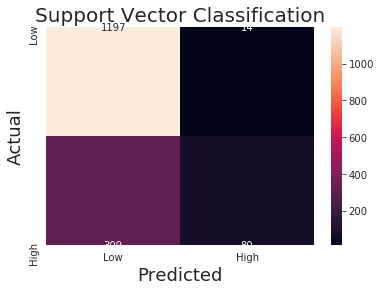

In [10]:
from helper_code import mlplots as ml

# Call confusion matrix plotting routine
ml.confusion(l_test['Label'], y_pred, labels, 'Support Vector Classification')

---
The confusion matrix shows that our SVM model doesn't do well in predicting high income class. When using this kernel, which is linear, for this model, the data set is not easily separable. You can try other kernels but this won't guarantee much improvements. This is the main disadvantage of SVM, that the performance relies on kernel selection. (Sometimes you may need to build a custom kernel for best result which requires intensive domain knowledge.) Another disadvantage of SVM is that the training process can be very slow, especially with non-linear kernels and large dataset. This is due to the computation complexity of the hyperplane calculation.

---

-----

<font color='red' size = '5'> Student Exercise </font>

In the preceding Code cells, we used a simple linear SVC to predict classifications for the Iris data. Now that you have run the notebook once, go back and make the following change to see how the results change.

1. Try other `kernel` when costruct SVC

How does the SVC performance compare to that from the KNN classification algorithm, or to that from the decision tree classification algorithm?

-----

-----

[[Back to TOC]](#Table-of-Contents)

## Support Vector Machine: Regression

To this point, we have only applied the support vector machine algorithm to classification tasks. This algorithm can also be applied to regression tasks by using hyperplanes to model the data distribution. Basically, this algorithm works on regression problems by mapping the training data into a high dimensional space, which might involve a non-linear kernel, and performing something akin to linear regression on the data in this higher dimensional space. Recall that for best performance, SVMs require the data be normalized prior to use.

To perform support vector regression, or SVR, we will use the `SVR` estimator in the `svm` module in the scikit-learn library. This estimator accepts a very similar list of hyperparameters to the `SVC` estimator discussed earlier in this notebook. One of the few important additions is the `epsilon` hyperparameter, which is used in the cost function that is minimized when constructing the SVR model. This term essentially defines a _tube_ around the best fit model wherein data inside the tube are ignored since they are _close_ to the model, and data outside are used to modify the final predictive model.

In the rest of this section, we demonstrate how to perform SVR on a complex data set, in this case the automotive fuel prediction data which was used in the previous notebooks.


-----

### Regression: Auto MPG Data

To demonstrate support vector regression, we will use the automobile fuel efficiency data set. For more information on these data, refer to the [online documentation][od] at the UCI website.

In the following Code cells, we first load these data into our notebook, then create dependent and independent variable with patsy module and split the data set to training and testing set. Next, we scale the training and testing data using `StandardScaler`. We fit `StandardScaler` with training data only and transform both training and testing data with fitted `StandardScaler`. If we scale data before splitting data we would use some information in the testing dataset to train the model. The testing data is then not pure _unseen_ data by the model.

----

[od]: https://archive.ics.uci.edu/ml/datasets/auto+mpg

In [11]:
import patsy as pts 

auto_data = pd.read_csv('mpg.csv')

# Create feature and label DataFrames using formula-based interface
formula = 'mpg ~ C(cylinders) + displacement + weight + acceleration + C(model_year) + C(origin)'
y, x = pts.dmatrices(formula, data=auto_data, return_type='dataframe')

# Split data into training:testing data set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=23)
x_train.sample(5)

,Intercept,C(cylinders)[T.4],C(cylinders)[T.5],C(cylinders)[T.6],C(cylinders)[T.8],C(model_year)[T.71],C(model_year)[T.72],C(model_year)[T.73],C(model_year)[T.74],C(model_year)[T.75],...,C(model_year)[T.78],C(model_year)[T.79],C(model_year)[T.80],C(model_year)[T.81],C(model_year)[T.82],C(origin)[T.japan],C(origin)[T.usa],displacement,weight,acceleration
97,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,225.0,3121.0,16.5
17,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,200.0,2587.0,16.0
252,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,231.0,3535.0,19.2
360,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,145.0,3160.0,19.6
246,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,78.0,1985.0,19.4


In [12]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
#fit with training data and transform training data
x_train_ss = ss.fit_transform(x_train)
#transform testing data
x_test_ss = ss.transform(x_test)

-----

With these data now loaded into a DataFrame and split into training and testing samples, we can create a regression model by using the `SVR` estimator in the `svm` module in the scikit-learn library. 

First, we create our estimator; in this case we simply use the default hyperparameters. 

Next, we fit the model to our training data. 

Finally, we compute a regression score, which by default is $R^2$, or the coefficient of determination. The second Code cell computes and displays other metrics, which in this case provide more insight into our performance. For example, the mean absolute errors indicate that we predict the miles per gallon for an automobile in the test data set within about 2.52 miles per gallon.

-----

In [13]:
from sklearn.svm import SVR

# Create Regressor with default properties
auto_model = SVR()

# Fit estimator and display score
auto_model = auto_model.fit(x_train_ss, y_train)
print(f'Regression Score = {auto_model.score(x_test_ss, y_test):5.3f}')

Regression Score = 0.776


In [14]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Regress on test data
pred = auto_model.predict(x_test_ss)

# Copute performance metrics
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
mr2 = r2_score(y_test, pred)

# Display metrics
print(f'R^2 Score             = {mr2:5.3f}')
print(f'Mean Absolute Error   = {mae:4.2f}')
print(f'Mean Squared Error    = {mse:4.2f}')


R^2 Score             = 0.776
Mean Absolute Error   = 2.52
Mean Squared Error    = 12.05


-----

<font color='red' size = '5'> Student Exercise </font>

In the preceding cells, we used support vector regression to model the fuel efficiency of automobiles. Try to improve the results by making the following changes. As you try these tasks, try to understand what has changed and if the change is good or bad.

1. Don't scale features before applying SVR.
2. Iteratively remove one or more of the categorical features from the training data.
3. Try using a different kernel function (the default is `rbf`). 

Finally, how does the SVR performance compare to that from the KNN regression algorithm, or to that from the decision tree regression algorithm?

-----

## Ancillary Information

The following links are to additional documentation that you might find helpful in learning this material. Reading these web-accessible documents is completely optional.

1. A [beginners guide][1] to support vector machines
2. An [introduction to machine learning][2] with support vector machines

-----

[1]: https://www.quantstart.com/articles/Support-Vector-Machines-A-Guide-for-Beginners
[2]: http://www.ritchieng.com/machine-learning-svms/